In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
y = []
lbs= []
ubs = []
 
naives = []
heur = []
for num_tasks in [10,50,100, 150, 200, 250,300,350,400]:
    counter = 0
    while counter != 10:
        
        seed=random.randint(0, 100000)
        edges = random.randint(2, num_tasks-1)
        num_machines = random.randint(2, num_tasks-1)
        G = random_dag(num_tasks, edges, seed=seed)
    
    
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, naive_version=1, iterations=2,verbose=False)
        _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
        d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
        
        # Record data only if solver was successful
        if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:

            x.append(num_tasks)
            heur.append(true)
            naives.append(naive)
            y.append(obj_opt)
            lbs.append(d["objective_task_scaling"])
            ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
            ubs.append(ub)
            counter += 1

        


apm 172.58.29.20_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           20
   Constants    :            0
   Variables    :          248
   Intermediates:            0
   Connections  :          200
   Equations    :          138
   Residuals    :          138
 
 Number of state variables:            248
 Number of total equations: -          157
 Number of slack variables: -           35
 ---------------------------------------
 Degrees of freedom       :             56
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0     Infinity  1.25000E+00
    1  2.88252E+01  1.12625E+00
    2  2.40067E+01  7.33906E-02
   

apm 172.58.29.20_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           14
   Constants    :            0
   Variables    :          116
   Intermediates:            0
   Connections  :           74
   Equations    :           72
   Residuals    :           72
 
 Number of state variables:            116
 Number of total equations: -           85
 Number of slack variables: -           29
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

Results
0 Speed: [0.9999999193] Ending Time: [2.9169125695] Interval: [1.91691, 2.91691] Task process time: 1.0
1 Speed: [1.5811388301] Ending Time: [0.63245552204] Interval: [0.0, 0.63246] Task process time: 0.63246
2 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
3 Speed: [1.7320508075] Ending Time: [1.2098057813] Interval: [0.63246, 1.20981] Task process time: 0.57735
4 Speed: [1.5811388301] Ending Time: [0.63245552204] Interval: [0.0, 0.63246] Task process time: 0.63246
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
7 Speed: [1.4142135624] Ending Time: [1.9169125525] Interval: [1.20981, 1.91691] Task process time: 0.70711
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task p

Results
0 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
1 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
2 Speed: [1.7320508076] Ending Time: [0.5773502592] Interval: [0.0, 0.57735] Task process time: 0.57735
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.0] Ending Time: [2.2844570204] Interval: [1.28446, 2.28446] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
8 Speed: [1.4142135624] Ending Time: [1.2844570304] Interval: [0.57735, 1.28446] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Obj

Results
0 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.0] Ending Time: [1.7071134359] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [1.0] Ending Time: [1.816496561] Interval: [0.8165, 1.8165] Task process time: 1.0
3 Speed: [1.0] Ending Time: [1.7071000865] Interval: [0.7071, 1.7071] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142002129] Ending Time: [0.70711344594] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.4142269117] Ending Time: [0.70710009654] Interval: [0.0, 0.7071] Task process time: 0.7071
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
9 Speed: [1.2247448714] Ending Time: [0.81649657094] Interval: [0.0, 0.8165] Task process time: 0.8165
Objective: 22.555833605
apm 172.58

Results
0 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.70710677119] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
Objec

Results
0 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
2 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
5 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
7 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
9 Speed: [0.99999999977] Ending Time: [0.99999999009] Interval: [0.0, 1.0] Task process time: 1.0
Object

Results
0 Speed: [1.4142135623] Ending Time: [0.70710677125] Interval: [0.0, 0.70711] Task process time: 0.70711
1 Speed: [0.99999999952] Ending Time: [0.99999999023] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.7320508082] Ending Time: [0.577350259] Interval: [0.0, 0.57735] Task process time: 0.57735
3 Speed: [0.99999999952] Ending Time: [0.99999999023] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [1.8164965611] Interval: [0.8165, 1.8165] Task process time: 1.0
5 Speed: [1.0] Ending Time: [1.7745966494] Interval: [0.7746, 1.7746] Task process time: 1.0
6 Speed: [0.99999999952] Ending Time: [0.99999999023] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999952] Ending Time: [0.99999999023] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067613] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [1.7320508084] Ending Time: [0.57735025894] Interval: [0.0, 0.57735] Task process time: 0.57735
10 Spe

Results
0 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
9 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
10 Speed: [0.99

  17  1.5592939e+02 4.63e-01 8.56e+00  -3.3 7.37e+01    -  7.19e-01 9.39e-01h  1
  18  1.5561137e+02 2.69e-01 3.35e+00  -4.5 1.99e+01    -  9.88e-01 1.00e+00h  1
  19  1.5555867e+02 1.22e-01 1.10e+00  -6.3 2.49e+01    -  9.26e-01 9.99e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.5560198e+02 3.34e-02 2.37e-01  -7.4 2.70e+01    -  9.88e-01 1.00e+00h  1
  21  1.5562919e+02 3.10e-03 1.96e-02 -11.0 5.77e-01    -  9.41e-01 9.90e-01h  1
  22  1.5563224e+02 2.36e-05 1.42e-04 -11.0 9.46e+00    -  9.69e-01 1.00e+00h  1
  23  1.5563227e+02 1.26e-09 7.56e-09 -11.0 3.01e+02    -  8.36e-01 1.00e+00h  1

Number of Iterations....: 23

                                   (scaled)                 (unscaled)
Objective...............:   1.5563226774295401e+02    1.5563226774295401e+02
Dual infeasibility......:   7.5568200254993544e-09    7.5568200254993544e-09
Constraint violation....:   1.2593206477617969e-09    1.2593206477617969e-09
Complementarity....

  12  1.1753980e+02 4.05e-01 6.48e+00  -4.5 8.75e+00    -  8.59e-01 1.00e+00h  1
  13  1.1616794e+02 2.17e-01 2.44e+00  -5.8 3.29e+00    -  9.82e-01 1.00e+00h  1
  14  1.1611674e+02 8.82e-02 7.31e-01  -6.9 1.39e+01    -  8.38e-01 1.00e+00h  1
  15  1.1644069e+02 1.85e-02 1.24e-01  -8.2 3.94e+00    -  9.81e-01 1.00e+00h  1
  16  1.1655667e+02 1.00e-03 6.23e-03 -11.0 3.35e-01    -  9.64e-01 9.92e-01h  1
  17  1.1656364e+02 2.41e-06 1.45e-05 -11.0 9.11e+00    -  9.18e-01 1.00e+00h  1
  18  1.1656365e+02 1.31e-11 2.52e-09 -11.0 2.52e-05  -4.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 18

                                   (scaled)                 (unscaled)
Objective...............:   1.1656365383851551e+02    1.1656365383851551e+02
Dual infeasibility......:   2.5197484099237499e-09    2.5197484099237499e-09
Constraint violation....:   1.3050610063429139e-11    1.3050610063429139e-11
Complementarity.........:   1.0003333897970616e-11    1.0003333897970616e-11
Overall NLP error......

apm 172.58.29.20_gk_model39 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           87
   Constants    :            0
   Variables    :         3967
   Intermediates:            0
   Connections  :         3687
   Equations    :         2080
   Residuals    :         2080
 
 Number of state variables:           3967
 Number of total equations: -         2166
 Number of slack variables: -          227
 ---------------------------------------
 Degrees of freedom       :           1574
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model41 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           96
   Constants    :            0
   Variables    :         5019
   Intermediates:            0
   Connections  :         4596
   Equations    :         2673
   Residuals    :         2673
 
 Number of state variables:           5019
 Number of total equations: -         2768
 Number of slack variables: -          370
 ---------------------------------------
 Degrees of freedom       :           1881
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model43 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           65
   Constants    :            0
   Variables    :         1633
   Intermediates:            0
   Connections  :         1465
   Equations    :          868
   Residuals    :          868
 
 Number of state variables:           1633
 Number of total equations: -          932
 Number of slack variables: -          115
 ---------------------------------------
 Degrees of freedom       :            586
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model45 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           58
   Constants    :            0
   Variables    :          921
   Intermediates:            0
   Connections  :          758
   Equations    :          513
   Residuals    :          513
 
 Number of state variables:            921
 Number of total equations: -          570
 Number of slack variables: -          110
 ---------------------------------------
 Degrees of freedom       :            241
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model47 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           70
   Constants    :            0
   Variables    :         2215
   Intermediates:            0
   Connections  :         1970
   Equations    :         1195
   Residuals    :         1195
 
 Number of state variables:           2215
 Number of total equations: -         1264
 Number of slack variables: -          192
 ---------------------------------------
 Degrees of freedom       :            759
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model49 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           62
   Constants    :            0
   Variables    :         1339
   Intermediates:            0
   Connections  :         1162
   Equations    :          727
   Residuals    :          727
 
 Number of state variables:           1339
 Number of total equations: -          788
 Number of slack variables: -          124
 ---------------------------------------
 Degrees of freedom       :            427
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model51 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           71
   Constants    :            0
   Variables    :         2310
   Intermediates:            0
   Connections  :         2071
   Equations    :         1239
   Residuals    :         1239
 
 Number of state variables:           2310
 Number of total equations: -         1309
 Number of slack variables: -          186
 ---------------------------------------
 Degrees of freedom       :            815
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

Reallocating memory for MA57: lfact (960934)
  23  1.4038541e+02 1.27e-10 3.34e-04 -11.0 1.54e+04    -  3.44e-01 1.00e+00h  1
  24  1.4038541e+02 2.70e-11 3.78e-06 -11.0 1.81e+04    -  9.92e-01 1.00e+00h  1
  25  1.4038541e+02 2.32e-11 6.22e-05 -11.0 5.97e+04    -  5.12e-01 1.00e+00h  1
  26  1.4038541e+02 1.46e-11 1.70e-11 -11.0 1.61e+03    -  1.00e+00 1.00e+00H  1

Number of Iterations....: 26

                                   (scaled)                 (unscaled)
Objective...............:   1.4038540685713508e+02    1.4038540685713508e+02
Dual infeasibility......:   1.7016033422687410e-11    1.7016033422687410e-11
Constraint violation....:   1.4551915228366852e-11    1.4551915228366852e-11
Complementarity.........:   3.0279607989091829e-10    3.0279607989091829e-10
Overall NLP error.......:   3.0279607989091829e-10    3.0279607989091829e-10


Number of objective function evaluations             = 28
Number of objective gradient evaluations             = 27
Number of equality constra

  12  1.5126518e+02 1.86e-05 1.16e-04 -10.6 3.69e-03    -  9.89e-01 9.90e-01h  1
  13  1.5126520e+02 8.40e-10 8.60e-09 -11.0 8.48e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 13

                                   (scaled)                 (unscaled)
Objective...............:   1.5126520476520187e+02    1.5126520476520187e+02
Dual infeasibility......:   8.6010825128823853e-09    8.6010825128823853e-09
Constraint violation....:   8.4031992475530615e-10    8.4031992475530615e-10
Complementarity.........:   3.7457880040111145e-10    3.7457880040111145e-10
Overall NLP error.......:   8.6010825128823853e-09    8.6010825128823853e-09


Number of objective function evaluations             = 14
Number of objective gradient evaluations             = 14
Number of equality constraint evaluations            = 14
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 14
Number of inequality constraint Jacobian evaluations = 0
Num

   3  6.5354307e+02 2.81e-02 5.27e+02   0.1 2.56e+02    -  3.07e-01 1.00e+00f  1
   4  6.5170615e+02 5.45e-04 5.14e+00  -1.8 9.32e-01   0.0 9.89e-01 1.00e+00h  1
   5  4.0418789e+02 2.61e+01 1.07e+02  -1.6 9.60e+03    -  1.10e-01 1.99e-02f  1
   6  3.9821056e+02 2.56e+01 1.35e+02  -0.1 2.25e+02    -  3.51e-02 8.09e-02f  1
   7  3.9649725e+02 1.60e+01 8.17e+01  -1.4 1.82e+00  -0.5 5.04e-01 6.51e-01h  1
   8  3.9711882e+02 1.11e+01 5.42e+01  -0.8 4.62e+00  -1.0 1.00e+00 4.83e-01h  1
   9  4.1667622e+02 9.68e+00 3.60e+01   0.2 3.32e+01  -0.5 5.80e-01 4.19e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.2179425e+02 8.97e+00 2.07e+01  -0.1 7.64e+00  -0.1 2.16e-02 4.82e-01h  1
  11  4.2479116e+02 8.35e+00 3.09e+01  -0.1 9.86e+00   0.3 2.00e-02 4.10e-01h  1
  12  4.0440056e+02 5.47e+00 9.06e+01  -6.0 3.83e+01    -  6.53e-02 4.99e-01f  1
  13  4.0583782e+02 5.43e+00 1.03e+03   1.3 2.33e+01   0.7 6.98e-01 4.26e-02f  1
  14  4.1770921e+02 6.09e+00

apm 172.58.29.20_gk_model59 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          120
   Constants    :            0
   Variables    :         4628
   Intermediates:            0
   Connections  :         3920
   Equations    :         2608
   Residuals    :         2608
 
 Number of state variables:           4628
 Number of total equations: -         2727
 Number of slack variables: -          605
 ---------------------------------------
 Degrees of freedom       :           1296
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.58.29.20_gk_model61 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          188
   Constants    :            0
   Variables    :        18235
   Intermediates:            0
   Connections  :        17588
   Equations    :         9347
   Residuals    :         9347
 


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-79a23e440f20>", line 25, in <module>
    naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, naive_version=1, iterations=2,verbose=False)
  File "/Users/jannie/scheduling_temp/iterative_heuristic/consolidated.py", line 139, in iterative_and_naive_heuristic_no_ratio
    test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=verbose)
  File "/Users/jannie/scheduling_temp/iterative_heuristic/modified_etf.py", line 61, in __init__
    self.h, self.t, self.order = self.etf()
  File "/Users/jannie/scheduling_temp/iterative_heuristic/modified_etf.py", line 276, in etf
    for m in range(self.num_machines):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/

KeyboardInterrupt: 

In [5]:
# naives = [572.8281617409056, 1331.3128540244006, 2051.988186148974, 4908.957570715966, 4427.097315671543, 10722.551392522024, 7706.784325022744, 18780.723094156718, 11887.994968277473, 29080.41842969494, 16967.104097800042, 41618.012251501, 22950.791107151243, 56400.18395313568, 29836.001750405976, 73423.87928867387, 37619.11087992854, 92685.47311048009, 46306.79788927975, 114191.64481211497, 55896.00853253448, 137939.34014765336]
# heurs = [351.14748449053826, 698.6688417479015, 1181.833119651485, 2392.931559303018, 2515.1051913091133, 5128.200522698374, 4320.182955770601, 8876.07384841392, 6602.766119158128, 13562.092685406415, 9411.33279943706, 19356.644767630198, 12670.852536835615, 26103.094518568214, 16404.64052815484, 33831.316526414616, 20688.501817054886, 42685.15172746671, 25668.437288627654, 52905.78716201741, 30587.45634664135, 63200.60308232752]
# y = [300.05921, 586.18851, 10000000, 1637.77108, 1520.32995, 10000000, 2333.07674, 10000000, 3254.04157, 6424.66253, 4271.75539, 10000000, 5377.87606, 10000000, 6565.71298, 12977.19203, 7829.99982, 10000000, 9169.60916, 10000000, 10571.28621, 20904.74224]
print(x)
print(heur)
print(naives)
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h, true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n, true in zip(naives, y)]
print(ratios3)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100]
[26.06975670013928, 27.00872326619392, 35.589364901994145, 27.779421361337704, 25.53197264742181, 27.06394529484362, 25.0, 35.657002675154324, 25.0, 24.53197264742181, 117.0, 172.99659748187304, 124.53306010814231, 155.4259231264322, 207.76314773417334, 252.79393923933986, 147.9658677965029, 178.61442840636303, 147.8873404898319, 164.54502395948361, 374.39339918376237, 408.59848170753713]
[25.41348460451408, 26.24191172926027, 33.52932938976704, 27.662407748957513, 24.777810114122513, 26.241911729260266, 24.142135623730947, 33.52932938976705, 24.142135623730947, 23.94938298937632, 114.08326112068532, 174.04955635154994, 122.55846973475329, 152.95622879752608, 218.98708276823555, 207.67200631242855, 144.09913456071433, 167.6466469488353, 150.83549142629104, 163.35797642804891, 348.67188916146273, 385.4773357195917]
[0.9748263053171611, 0.9716087454643424, 0.9421165418967149, 0.9957877591884241, 0.

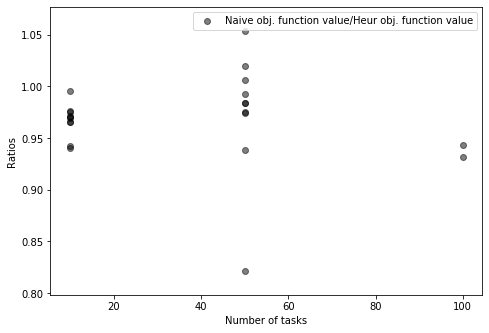

In [6]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
 

# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive obj. function value/Heur obj. function value', color='k', alpha = 0.5)
# plt.scatter(x, ratios2, label='Heur/Optimal', color='r', alpha = 0.5)
# plt.scatter(x, ratios3, label='Naive/Optimal', color='b', alpha = 0.5)
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()